# Correção de dados

## Correção do conjunto de produtos e categorias


In [9]:
import pandas as pd
import numpy as np
import json
import re

df_sales = pd.read_csv('geral.csv', index_col=0)
df_sales.index = pd.to_datetime(df_sales.index)

df_stock = pd.read_csv('estoque.csv', index_col=0)
df_stock.index = pd.to_datetime(df_stock.index)

df_prods = pd.read_csv('PRODUTOS.csv', delimiter=';', encoding = 'cp1252')

def to_int(x):
    try:
        return int(re.sub('[^0-9]', '', x))
    except: # Nan, None
        return -1

df_prods['COD_PRODUTO'] = df_prods['COD_PRODUTO'].apply(lambda x : to_int(x))
# Remover os produtos com codigo = -1
df_prods = df_prods[df_prods['COD_PRODUTO'] != -1]

cods = json.load(open('cod_produto.json'))
cats = json.load(open('classificacao.json'))

In [13]:
# Executar esse bloco se não for processar tudo do 0!
df_sales2 = pd.read_csv('geral2.csv', index_col=0)
df_sales2.index = pd.to_datetime(df_sales2.index)

Alguns códigos estão associados a mais de um nome de produto, mas o que se percebe é que se trata de uma renomeação do produto.

<AxesSubplot:>

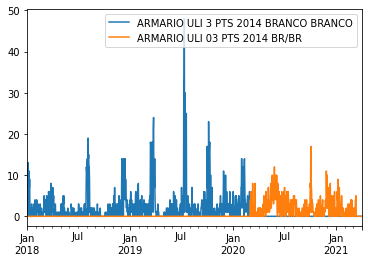

In [2]:
df_sales[['ARMARIO ULI 3 PTS 2014 BRANCO BRANCO', 'ARMARIO ULI 03 PTS 2014 BR/BR']].plot()

### Correção das vendas, agrupando produtos com mesmo código

In [3]:
df_sales2 = pd.DataFrame(index=df_sales.index, columns=['0'])

for cod in cods:
    df_sales2[cods[cod][0]] = df_sales[cods[cod]].sum(axis=1)
    
df_sales2.drop(columns=['0'], inplace=True)

df_sales2

,CONDICIONADOR DE AR TIPO SPLIT FIT CCSF9-R4,REFRIGERADOR ROC 31 BR,"TELEVISOR SMART 32"" 32PHG5102 PHILIPS","TELEVISOR SMART 32"" PH32E20DSGWA PHILCO",UNIDADE EVAPORADORA 12000BTUS 42MACA12S5,"TELEVISOR SMART 32"" KDL-32W655D SONY","TELEVISOR SMART 43"" 43PFG5102 PHILIPS",UNIDADE CONDENSADORA 12000BTUS 38KCX12S5,"TELEVISOR 40"" L40D2900 SEMP TCL",SMARTPHONE SAMSUNG GAL J7 PRIME DB DOURADO,...,CLIMATIZADOR ELGIN BIG AIR 220V 65L,"CAB.BOX 1,60 ILHA BELA FRAMAR TECI. 25",FORNO ELETRICO AIRFRY 6 EM 1 40L FOR4 ARNO,COLCHAO D20 REAL MASTER LISO 188X138X012,FOGAO AGILE UP GLASS 4 BOCAS INOX,FOGAO AGILE UP GLASS 5 BOCAS INOX,VENTILADOR 30CM ECO 6PAS MESA BRONZE,BOX BLUE NEW 96X28X203,AR CONDICIONADO 9000 BTU/H TAC-09CSA1 INV,ESCORREDOR DE 16 PRATOS INOX 2099116
2018-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-02,0,10,0,0,10,23,0,10,9,35,...,0,0,0,0,0,0,0,0,0,0
2018-01-03,1,9,0,0,10,17,0,10,4,28,...,0,0,0,0,0,0,0,0,0,0
2018-01-04,25,5,0,0,9,8,0,9,9,7,...,0,0,0,0,0,0,0,0,0,0
2018-01-05,25,1,0,0,10,18,0,10,9,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-03-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-03-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-03-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Correção dos estoques (geral), agrupando produtos com mesmo código

In [12]:
df_stock2 = pd.DataFrame(index=df_stock.index, columns=['0'])

for cod in cods:
    df_stock2[cods[cod][0]] = df_stock[cods[cod]].sum(axis=1)
    
df_stock2.drop(columns=['0'], inplace=True)

df_stock2

,CONDICIONADOR DE AR TIPO SPLIT FIT CCSF9-R4,REFRIGERADOR ROC 31 BR,"TELEVISOR SMART 32"" 32PHG5102 PHILIPS","TELEVISOR SMART 32"" PH32E20DSGWA PHILCO",UNIDADE EVAPORADORA 12000BTUS 42MACA12S5,"TELEVISOR SMART 32"" KDL-32W655D SONY","TELEVISOR SMART 43"" 43PFG5102 PHILIPS",UNIDADE CONDENSADORA 12000BTUS 38KCX12S5,"TELEVISOR 40"" L40D2900 SEMP TCL",SMARTPHONE SAMSUNG GAL J7 PRIME DB DOURADO,...,CLIMATIZADOR ELGIN BIG AIR 220V 65L,"CAB.BOX 1,60 ILHA BELA FRAMAR TECI. 25",FORNO ELETRICO AIRFRY 6 EM 1 40L FOR4 ARNO,COLCHAO D20 REAL MASTER LISO 188X138X012,FOGAO AGILE UP GLASS 4 BOCAS INOX,FOGAO AGILE UP GLASS 5 BOCAS INOX,VENTILADOR 30CM ECO 6PAS MESA BRONZE,BOX BLUE NEW 96X28X203,AR CONDICIONADO 9000 BTU/H TAC-09CSA1 INV,ESCORREDOR DE 16 PRATOS INOX 2099116
2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-28,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,69.0,0.0,79.0,51.0,66.0,39.0,321.0,18.0,26.0,280.0
2021-03-29,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,69.0,0.0,79.0,51.0,66.0,39.0,321.0,18.0,26.0,280.0
2021-03-30,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,69.0,0.0,79.0,51.0,66.0,39.0,321.0,18.0,26.0,280.0
2021-03-31,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,69.0,0.0,79.0,51.0,66.0,39.0,321.0,18.0,26.0,280.0


### Verificar se existem casos ondem um código está associado a mais de um nome de produto e esses produtos venderam em uma data

In [4]:
cods_geq2 = {cod: cods[cod] for cod in cods if len(cods[cod]) > 1}

In [5]:
df_sales[cods['25638']].loc[(df_sales[cods['25638'][1]] == df_sales[cods['25638'][0]]) & (df_sales[cods['25638'][0]] > 0)]

,ROUPEIRO 2PTS 8GAV C/PES JACARANDA CBG551-JA,ROUPEIRO 2PTS 8GAV C/PES JACARANDA CBG551-JÁ
2020-06-01,1,1


Único caso de código de produto que contém mais de um produto e que os produtos possuem pelo menos uma mesma data com vendas.

In [6]:
print(df_sales[df_sales2.columns].sum().sum(), df_sales2.sum().sum())

5900856 6118470


In [7]:
cats = {}

for cod in cods:
    cats[cod] = df_prods[df_prods['COD_PRODUTO'] == int(cod)]['Desc Grupo'].unique()

In [8]:
empty_cats = []
two_or_more_cats = []

for cod in cats:
    if len(cats[cod]) == 0:
        empty_cats += cod
    elif len(cats[cod]) > 1:
        two_or_more_cats += cod
        
print(len(empty_cats), len(two_or_more_cats))

0 5


Pelo que se vê, todo código está associado a pelo menos uma categoria, sendo 5 o número de códigos que estão associados a mais de uma categoria.

In [9]:
cats_prods = {cods[cod][0]: list(cats[cod]) for cod in cods}

In [10]:
for prod in cats_prods:
    if len(cats_prods[prod]) > 1:
        print(prod, cats_prods[prod])

BANCADA CD-143 C/ADEGA CARV/OX UV ['ELETROPORTATEIS', 'MOVEIS']


Dos produtos que estamos trabalhando há apenas um caso desse tipo.

In [11]:
cats = {cat: [] for cat in df_prods['Desc Grupo'].unique()}

for prod in cats_prods:
    cats[cats_prods[prod][0]].append(prod)

In [12]:
for cat in cats:
    print(cat, len(cats[cat]))

nan 1
MOVEIS 3181
COLCHAO 320
ELETROPORTATEIS 430
BRINQUEDOS 6
INFORMATICA 292
ELETRODOMESTICOS 461
UTILIDADES DOMESTICAS 159
ESPORTE E FITNESS 220
TV E VIDEO 249
AUDIO E SOM 164
AR E VENTILACAO 198
CELULAR 812
AUTOMOTIVO 45
BELEZA E SAUDE 165
GAME 12
BEBES 4
RELOGIO 186
USO E CONSUMO 0


<AxesSubplot:>

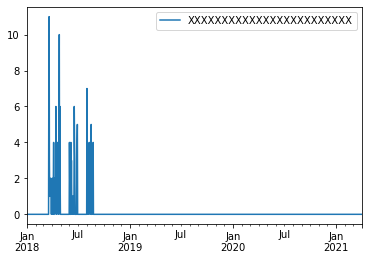

In [17]:
df_sales2[cats[np.nan]].plot()

Por conta da falta de ideia do que se trata essa categoria (e o produto que ela contém), ambos serão removidos.

In [20]:
df_sales.drop(columns=cats[np.nan], inplace=True)

del cats[np.nan]

### Adicionar colunas das categorias
As colunas das categorias contém a soma das vendas ou estoque (a depender do tipo de tabela) de todos os produtos desta.

In [14]:
for cat in cats:
    df_sales2[cat] = df_sales2[cats[cat]].sum(axis=1)
    df_stock2[cat] = df_stock2[cats[cat]].sum(axis=1)

In [16]:
df_sales2[cats.keys()]

,MOVEIS,COLCHAO,ELETROPORTATEIS,BRINQUEDOS,INFORMATICA,ELETRODOMESTICOS,UTILIDADES DOMESTICAS,ESPORTE E FITNESS,TV E VIDEO,AUDIO E SOM,AR E VENTILACAO,CELULAR,AUTOMOTIVO,BELEZA E SAUDE,GAME,BEBES,RELOGIO,USO E CONSUMO
2018-01-01,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.0
2018-01-02,671,330,926,0,493,619,19,133,463,112,1248,2382,49,207,7,0,2,0.0
2018-01-03,664,304,910,0,520,583,14,136,429,110,1064,2146,47,183,13,0,1,0.0
2018-01-04,1075,398,1391,0,702,1123,37,211,819,140,2561,2082,72,370,7,0,1,0.0
2018-01-05,1382,523,1975,0,858,1630,57,232,1239,211,2531,2607,73,468,22,0,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2021-03-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2021-03-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2021-03-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [15]:
df_stock2[cats.keys()]

,MOVEIS,COLCHAO,ELETROPORTATEIS,BRINQUEDOS,INFORMATICA,ELETRODOMESTICOS,UTILIDADES DOMESTICAS,ESPORTE E FITNESS,TV E VIDEO,AUDIO E SOM,AR E VENTILACAO,CELULAR,AUTOMOTIVO,BELEZA E SAUDE,GAME,BEBES,RELOGIO,USO E CONSUMO
2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-28,16725.0,4986.0,18459.0,0.0,2821.0,9678.0,18233.0,5729.0,6358.0,3233.0,22352.0,21842.0,194.0,11385.0,7.0,2.0,98.0,0.0
2021-03-29,16725.0,4986.0,18459.0,0.0,2821.0,9678.0,18233.0,5729.0,6358.0,3233.0,22352.0,21842.0,194.0,11385.0,7.0,2.0,98.0,0.0
2021-03-30,16725.0,4986.0,18459.0,0.0,2821.0,9678.0,18233.0,5729.0,6358.0,3233.0,22352.0,21842.0,194.0,11385.0,7.0,2.0,98.0,0.0
2021-03-31,16725.0,4986.0,18459.0,0.0,2821.0,9678.0,18233.0,5729.0,6358.0,3233.0,22352.0,21842.0,194.0,11385.0,7.0,2.0,98.0,0.0


In [13]:
df_sales2.to_csv('geral2.csv')
df_stock2.to_csv('estoque2.csv')

with open('classificacao.json', 'w') as fp:
    json.dump(cats, fp)

## Criação do dicionário de produtos ativos
Define-se como produto ativo aquele que ainda está sendo vendido

In [13]:
df_prods2 = pd.read_csv('PRODUTOS2.csv', delimiter=';', encoding = 'cp1252')

df_prods2['COD_PRODUTO'] = df_prods2['COD_PRODUTO'].apply(lambda x : to_int(x))
# Remover os produtos com codigo = -1
df_prods2 = df_prods2[df_prods2['COD_PRODUTO'] != -1]
df_prods2['ATIVO'] = df_prods2['ATIVO'].apply(lambda x : 1 if x == 'S' else 0)

In [17]:
df_prods2

,COD_PRODUTO,PRODUTO,FORNECEDOR,COD_CLASS1,COD_CLASS2,COD_CLASSIFICACAO,CLASS1,CLASS2,CLASSIFICACAO,Cod Grupo,Desc Grupo,ATIVO,Unnamed: 12
0,633,TV COLOR TVC 163 R,NaN,1.0,101.0,10101.0,TECNOLOGIA,TECNOLOGIA TV E VIDEO,TECNOLOGIA TV E VIDEO TV,1003,TV E VIDEO,0,NaN
1,820,TV COLOR TVC 140 R,NaN,1.0,101.0,10101.0,TECNOLOGIA,TECNOLOGIA TV E VIDEO,TECNOLOGIA TV E VIDEO TV,1000,MOVEIS,0,NaN
2,924,TELEVISOR COR 28 CT 7690,NaN,1.0,101.0,10101.0,TECNOLOGIA,TECNOLOGIA TV E VIDEO,TECNOLOGIA TV E VIDEO TV,1000,MOVEIS,0,NaN
3,1187,TV B PRETO 17,NaN,1.0,101.0,10101.0,TECNOLOGIA,TECNOLOGIA TV E VIDEO,TECNOLOGIA TV E VIDEO TV,1003,TV E VIDEO,0,NaN
4,1256,TV TVC 100,NaN,1.0,101.0,10101.0,TECNOLOGIA,TECNOLOGIA TV E VIDEO,TECNOLOGIA TV E VIDEO TV,1000,MOVEIS,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35628,15687,MDF CINZA CRISTAL 2L 25X275X185 P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0099,MOVEIS EM PRODUCAO,0,NaN
35629,15688,MDF CINZA CRISTAL 2L 15X275X185 P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0099,MOVEIS EM PRODUCAO,0,NaN
35630,15689,FITA P BORDA CINZA CRISTAL R50M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0099,MOVEIS EM PRODUCAO,0,NaN
35631,15690,PARAF RASTEX AA 6.3X11 DU 243 79520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0099,MOVEIS EM PRODUCAO,0,NaN


In [26]:
active = {0: [], 1: []}

for row in df_prods2.itertuples():
    active[row[12]].append(row[2])

In [31]:
# Reduzir o tamanho do dicionário por meio da remoção dos produtos que não está na base de dados de vendas
print('Size before: active[0] = %d active[1] = %d' % (len(active[0]), len(active[1])))
a0 = [x for x in active[0] if x in df_sales.columns]
a1 = [x for x in active[1] if x in df_sales.columns]

active[0] = a0
active[1] = a1
print('Size after: active[0] = %d active[1] = %d' % (len(active[0]), len(active[1])))

Size before: active[0] = 23546 active[1] = 12084
Size after: active[0] = 3869 active[1] = 2566


In [32]:
# Exportar
with open('ativo.json', 'w') as fp:
    json.dump(active, fp)

In [2]:
df_sales = pd.read_csv('Resumo Lojas.csv', index_col=0)
df_sales.index = pd.to_datetime(df_sales.index)

In [8]:
[x for x in df_sales.columns if 'GERAL' in x]

['Patos II|GERAL',
 'Pombal|GERAL',
 'Itaporanga|GERAL',
 'Matriz|GERAL',
 'Patos I|GERAL',
 'Ico|GERAL',
 'Patos IV|GERAL',
 'Sousa II|GERAL',
 'Pianco|GERAL',
 'Patos III|GERAL',
 'Iguatu|GERAL',
 'teste|GERAL',
 'Sousa I|GERAL',
 'Joao Dourado|GERAL',
 'Irece I|GERAL',
 'Jacobina|GERAL',
 'Irece II|GERAL',
 'Itambe|GERAL',
 'Goiana|GERAL',
 'Cabedelo|GERAL',
 'Mangabeira Shopping|GERAL',
 'Bancarios|GERAL',
 'Timbauba|GERAL',
 'Bayeux|GERAL',
 'Goiana 2|GERAL',
 'CABEDELO BR|GERAL',
 'Sta. Rita|GERAL',
 'Manaira|GERAL',
 'Lagoa|GERAL',
 'Mangabeira|GERAL',
 'Barao|GERAL',
 'Geisel|GERAL',
 'Alhandra|GERAL',
 'Itabaiana|GERAL',
 'Sto. Elias|GERAL',
 'Aristides Lobo|GERAL',
 'Picui|GERAL',
 'Guarabira|GERAL',
 'Campina Grande IV|GERAL',
 'AREIA|GERAL',
 'Campina Grande II|GERAL',
 'Esperanca|GERAL',
 'Mamanguape|GERAL',
 'Campina Grande I|GERAL',
 'Alagoa Grande|GERAL',
 'Monteiro 2|GERAL',
 'Cuite|GERAL',
 'Campina Grande III|GERAL',
 'Queimadas|GERAL',
 'Soledade|GERAL',
 'Lagoa Sec